In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = np.load('Data/Train/X.npy')
X_prime_train = np.load('Data/Train/X_prime.npy')
feature_info_train = np.load('Data/Train/feature_information.npy')

In [3]:
trainDataTrue = pd.DataFrame(data=X_train)
trainData = pd.DataFrame(data=X_prime_train)
print(trainData.shape)
trainData.head()

(30162, 106)


,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1. Correlation between numerical features:

In [4]:
# Numerical data

numData = trainDataTrue.iloc[:,0:6]
numData.columns = ['age', 'fnlwgt', 'educationNum', 'capitalGain', 'capitalLoss', 'hoursPerWeek']
numData.head()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959


In [24]:
# Income = 1 if >=50k, 0 if <50k
income_val = []
for idx, row in trainDataTrue.iterrows():
    income = 0 if row[104] == 1.0 else 1
    income_val.append(income)
numData['income'] = np.array(income_val)
numData.head()

<ipython-input-24-a26300d8957b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['income'] = np.array(income_val)


,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,income,gender
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959,0,0
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449,0,0
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959,0,0
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959,0,0
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959,1,1


In [21]:
gender_val = []
for idx, row in trainDataTrue.iterrows():
    gender = 1 if row[61] == 1.0 else 0
    gender_val.append(gender)
numData['gender'] = np.array(gender_val)
numData.head()

<ipython-input-21-1a2b2d9c5f83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['gender'] = np.array(gender_val)


,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,income,gender
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959,0,0
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449,0,0
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959,0,0
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959,0,0
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959,1,1


In [22]:
numData.cov()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,income,gender
age,0.036657,-0.000879,0.000878,0.000857,0.000884,0.001866,0.014724,-0.005981
fnlwgt,-0.000879,0.005908,-0.000569,-0.000012,-0.000067,-0.000148,-0.000175,-0.000707
educationNum,0.000878,-0.000569,0.059182,0.001118,0.000912,0.001935,0.019828,0.000945
capitalGain,0.000857,-0.000012,0.001118,0.004968,-0.000180,0.000458,0.005756,-0.001385
capitalLoss,0.000884,-0.000067,0.000912,-0.000180,0.007789,0.000476,0.005084,-0.001641
hoursPerWeek,0.001866,-0.000148,0.001935,0.000458,0.000476,0.028419,0.009862,-0.011078
income,0.014724,-0.000175,0.019828,0.005756,0.005084,0.009862,0.219061,-0.035403
gender,-0.005981,-0.000707,0.000945,-0.001385,-0.001641,-0.011078,-0.035403,0.205865


In [23]:
numData.corr()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,income,gender
age,1.000000,-0.059707,0.018850,0.063523,0.052327,0.057820,0.164314,-0.068846
fnlwgt,-0.059707,1.000000,-0.030402,-0.002291,-0.009834,-0.011427,-0.004851,-0.020272
educationNum,0.018850,-0.030402,1.000000,0.065201,0.042465,0.047185,0.174143,0.008564
capitalGain,0.063523,-0.002291,0.065201,1.000000,-0.028940,0.038546,0.174470,-0.043308
capitalLoss,0.052327,-0.009834,0.042465,-0.028940,1.000000,0.031978,0.123082,-0.040985
hoursPerWeek,0.057820,-0.011427,0.047185,0.038546,0.031978,1.000000,0.124987,-0.144835
income,0.164314,-0.004851,0.174143,0.174470,0.123082,0.124987,1.000000,-0.166711
gender,-0.068846,-0.020272,0.008564,-0.043308,-0.040985,-0.144835,-0.166711,1.000000


#### 2. Categorical variables Analysis:

In [28]:
workclass_val = []
for idx, row in trainDataTrue.iterrows():
    workClassOneHot = row[6:13].to_numpy()
    workclass_val.append(np.argmax(workClassOneHot))
numData['workClass'] = np.array(workclass_val)

<ipython-input-28-48724ba78968>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['workClass'] = np.array(workclass_val)


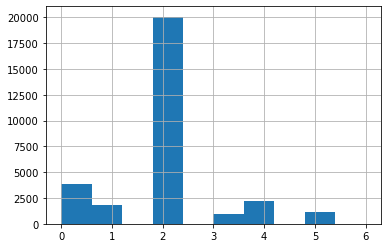

In [43]:
numData['workClass'].hist()

In [44]:
numData['workClass'].value_counts()

2    20072
0     3860
4     2239
1     1854
5     1166
3      957
6       14
Name: workClass, dtype: int64

In [31]:
education_val = []
for idx, row in trainDataTrue.iterrows():
    educationOneHot = row[13:29].to_numpy()
    education_val.append(np.argmax(educationOneHot))
numData['education'] = np.array(education_val)

<ipython-input-31-97c9934ae48f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['education'] = np.array(education_val)


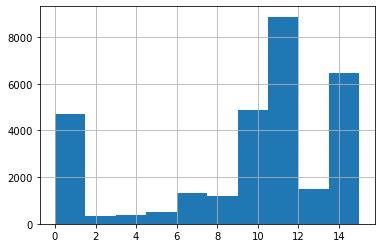

In [46]:
numData['education'].hist()

In [32]:
marital_status_val = []
for idx, row in trainDataTrue.iterrows():
    maritalStatusOneHot = row[29:36].to_numpy()
    marital_status_val.append(np.argmax(maritalStatusOneHot))
numData['maritalStatus'] = np.array(marital_status_val)

<ipython-input-32-9bd326fc51f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['maritalStatus'] = np.array(marital_status_val)


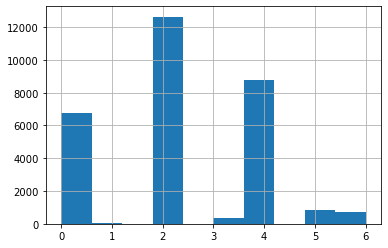

In [48]:
numData['maritalStatus'].hist()

In [50]:
numData['maritalStatus'].value_counts()

2    12640
4     8800
0     6784
5      841
6      745
3      333
1       19
Name: maritalStatus, dtype: int64

In [33]:
occupation_val = []
for idx, row in trainDataTrue.iterrows():
    occupationOneHot = row[36:49].to_numpy()
    occupation_val.append(np.argmax(occupationOneHot))
numData['occupation'] = np.array(occupation_val)

<ipython-input-33-02515ec62635>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['occupation'] = np.array(occupation_val)


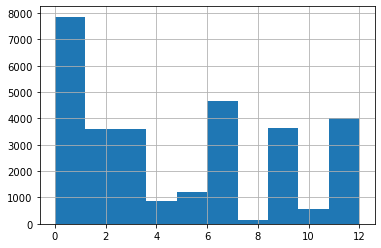

In [49]:
numData['occupation'].hist()

In [34]:
race_val = []
for idx, row in trainDataTrue.iterrows():
    raceOneHot = row[56:61].to_numpy()
    race_val.append(np.argmax(raceOneHot))
numData['race'] = np.array(race_val)

<ipython-input-34-0e33ecd1b805>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['race'] = np.array(race_val)


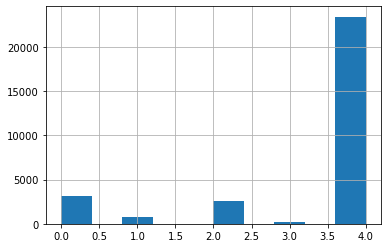

In [51]:
numData['race'].hist()

In [35]:
numData.head()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,income,gender,workClass,education,maritalStatus,occupation,race
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959,0,0,5,9,0,0,0
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449,0,0,4,9,2,3,4
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959,0,0,2,11,0,5,4
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959,0,0,2,1,2,5,2
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959,1,1,2,9,2,9,2


#### 3. Correlation of categorical to numerical features: 

##### Anova test : 

The ANOVA test assesses whether the averages of more than two groups are statistically different from each other. This analysis is appropriate for comparing the averages of a numerical variable for more than two categories of a categorical variable. 

The greater the F score value the higher the correlation will be.

In [25]:
def anova(df, col):
    sum_by_group = df.groupby(col).sum()
    count_by_group = df.groupby(col).count()

    k = len(sum_by_group)

    # between group
    ss_b = (sum_by_group**2/count_by_group).sum() - (sum_by_group.sum()**2 / count_by_group.sum())
    df_b = k - 1

    #     within groups
    temp = df.drop(columns = [col])**2
    temp[col] = df[col]
    squared = temp.groupby(col).sum()
    ss_w = squared.sum() - (sum_by_group**2/count_by_group).sum()
    df_w = (count_by_group.sum() - k)

    ms_b = ss_b / df_b
    ms_w = ss_w / df_w
    F = ms_b / ms_w
    #     pd.options.display.float_format = "{:,.8f}".format
    return F

In [26]:
anova(numData, 'gender')

age             143.630300
fnlwgt           12.398903
educationNum      2.212073
capitalGain      56.673257
capitalLoss      50.746800
hoursPerWeek    646.230691
income          862.185094
dtype: float64

In [27]:
anova(numData, 'income')

age             836.885283
fnlwgt            0.709681
educationNum    943.230273
capitalGain     946.885482
capitalLoss     463.928854
hoursPerWeek    478.628099
gender          862.185094
dtype: float64

In [36]:
anova(numData, 'race')

age               6.522688
fnlwgt           82.920524
educationNum     32.496196
capitalGain       4.476821
capitalLoss       4.339086
hoursPerWeek      9.666773
income           36.385642
gender           82.276893
workClass        15.515031
education         3.101143
maritalStatus    45.258832
occupation        3.276097
dtype: float64

In [37]:
anova(numData, 'occupation')

age               61.391108
fnlwgt             5.129996
educationNum     317.643516
capitalGain       29.863970
capitalLoss       15.081722
hoursPerWeek      67.936399
income           207.091713
gender           242.823272
workClass         44.274906
education         31.933966
maritalStatus     49.424332
race               9.615931
dtype: float64

In [38]:
country_val = []
for idx, row in trainDataTrue.iterrows():
    countryOneHot = row[63:104].to_numpy()
    country_val.append(np.argmax(countryOneHot))
numData['nativeCountry'] = np.array(country_val)

<ipython-input-38-96d5d99f3a37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numData['nativeCountry'] = np.array(country_val)


In [47]:
anova(numData, 'nativeCountry')

age               4.989207
fnlwgt           15.101324
educationNum     23.118901
capitalGain       0.712096
capitalLoss       1.355041
hoursPerWeek      1.718672
income            5.977837
gender            2.833272
workClass         2.271788
education         9.360163
maritalStatus     2.211332
occupation        2.198772
race             47.491254
dtype: float64

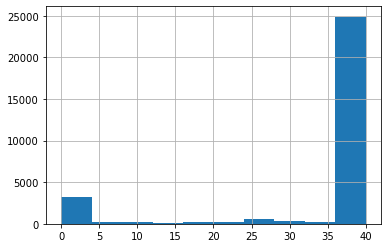

In [41]:
numData['nativeCountry'].hist()

In [42]:
numData['nativeCountry'].value_counts()

38    24798
0      2992
25      558
29      170
10      114
32       95
1        92
18       92
7        90
8        81
4        79
22       72
34       65
2        63
39       59
5        57
12       57
21       57
3        53
30       51
23       49
19       39
13       38
35       36
31       30
26       28
28       28
11       27
9        24
6        23
20       21
16       19
37       16
36       15
40       15
24       14
27       13
33       11
17       10
15       10
14        1
Name: nativeCountry, dtype: int64